In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math

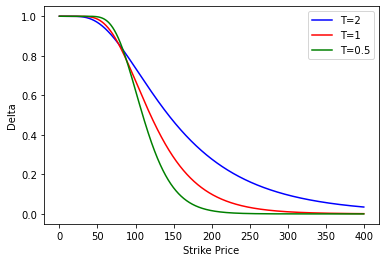

In [3]:
def delta_call (r, S, K, T, sigma):
    d1 = 1/(sigma*np.sqrt(T-t))*(np.log(S/K)+(r+(sigma**2)/2)*(T-t))
    delta = norm.cdf(d1)
    return delta

t = 0
S = 100
r = 0.1
sigma = 0.4

K = np.linspace(0.0001,400,10000)
delta_result1 =[]
delta_result2 =[]
delta_result0 =[]

for y in K:
    delta_result1.append(delta_call (r, S, y, 1, sigma))
    delta_result2.append(delta_call (r, S, y, 2, sigma))
    delta_result0.append(delta_call (r, S, y, 0.5, sigma))

plt.plot(K, delta_result2, color="blue", label = "T=2")
plt.plot(K, delta_result1, color="red", label = "T=1")
plt.plot(K, delta_result0, color="green", label = "T=0.5")
plt.legend()
plt.xlabel("Strike Price")
plt.ylabel("Delta")

plt.show()

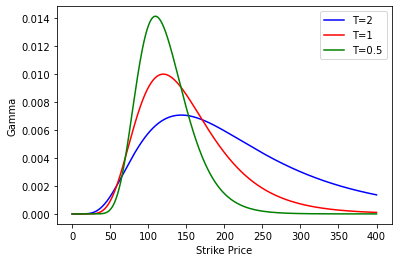

In [4]:
def gamma_call (r, S, K, T, sigma):
    d1 = 1/(sigma*np.sqrt(T-t))*(np.log(S/K)+(r+(sigma**2)/2)*(T-t))
    gamma = 1/(S*sigma*np.sqrt(T-t))*(1/np.sqrt(2*math.pi))*(math.e**(-1/2*d1**2))
    return gamma

K = np.linspace(0.0001,400,10000)
delta_result1 =[]
delta_result2 =[]
delta_result0 =[]

for y in K:
    delta_result1.append(gamma_call (r, S, y, 1, sigma))
    delta_result2.append(gamma_call (r, S, y, 2, sigma))
    delta_result0.append(gamma_call (r, S, y, 0.5, sigma))

plt.plot(K, delta_result2, color="blue", label = "T=2")
plt.plot(K, delta_result1, color="red", label = "T=1")
plt.plot(K, delta_result0, color="green", label = "T=0.5")
plt.legend()
plt.xlabel("Strike Price")
plt.ylabel("Gamma")

plt.show()

In [4]:
# S0 : Spot price of the underlying asset
# u : up factor
# d : down factor
# r : annualised discount rate
# T : maturity (in years)
# n : number of layers
# type : ‘c’/‘C’ for calls, ‘p’/‘P’ for puts

def option_pricer (S0, u, d, r, T, n, K, type):
    St = [[S0]]
    for i in range(1,n+1):
        new_S = [0]*(i+1)
        for j in range (i+1):
            new_S[j] = S0*u**(i-j)*d**(j)
        St = St +[new_S]
    
    payoff = [[0]*(n+1)]
    for i in range (n+1):
        if type =="c" or type =="C":
            payoff[0][i] = max(St[n][i]-K,0)
        elif type == "p" or type =="P":
            payoff[0][i] = max(K-St[n][i],0)
    
    t = T/n
    q = (math.exp(r*t)-d) /(u-d)
    for i in range (n-1, -1, -1):
        new_payoff = [0]*(i+1)
        for j in range (i+1):
            new_payoff [j] = math.exp(-r*t)*(q*payoff[0][j]+(1-q)*payoff[0][j+1])
            if type =="C":
                new_payoff[j] = max(new_payoff[i], St[i][j]-K)
            elif type =="P":
                new_payoff [j] = max(new_payoff[i],K-St[i][j])
        payoff = [new_payoff]+payoff
    return payoff[0][0]

print("European put option with strike price 106: ",option_pricer (S0=100, u=1.2, d=0.9, r=0.1, T=2, n=2, K=106, type="p"))
print("American put option with strike price 106: ",option_pricer (S0=100, u=1.2, d=0.9, r=0.1, T=2, n=2, K=106, type="P"))

European put option with strike price 106:  2.0451336516641345
American put option with strike price 106:  6


In [6]:
print("European put option with strike price 86: ",option_pricer (S0=50, u=1.06, d=0.95, r=0.05, T=0.5, n=2, K=51, type="p"))
print("American put option with strike price 86: ",option_pricer (S0=100, u=1.2, d=0.9, r=0.1, T=2, n=2, K=86, type="P"))

European put option with strike price 86:  1.37587665196338
American put option with strike price 86:  0.40902673033282694


In [7]:
print("European put option with strike price 86: ",option_pricer (S0=50, u=1.06, d=0.95, r=0.05, T=0.5, n=2, K=51, type="p"))
print("European put option with strike price 86: ",option_pricer (S0=50, u=1.06, d=0.95, r=0.05, T=0.5, n=2, K=51, type="P"))

European put option with strike price 86:  1.37587665196338
European put option with strike price 86:  1.4901239984754546


In [8]:
print(option_pricer (S0=20, u=1.25, d=0.8, r=0.04, T=1, n=2, K=21.8, type="p"))

3.1192867492989698


In [7]:
print(option_pricer (S0=100, u=1.25, d=0.8, r=0.02, T=3, n=3, K=105, type="P"))

12.513796757413564


In [8]:
print(option_pricer (S0=100, u=1.1, d=1/1.1, r=0.01, T=2, n=2, K=102, type="P"))

5.173660804351607
